<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/21_2_%D0%9E%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Навигация по уроку**

1. [Рекуррентные нейронные сети](https://colab.research.google.com/drive/1Mm5yFeJXZT9YcwlQMGx_T5JcEVgV8ZWy)
2. Одномерные сверточные нейронные сети
3. [Сравнение архитектур рекуррентных и одномерных сверточных сетей](https://colab.research.google.com/drive/15-SEqMwU3ALZmiEtlJFZllc38VTGHkGu)
4. [Домашняя работа](https://colab.research.google.com/drive/1NMDG3ZeGgyHm0ei0DOC63PBb9rW6oN3O)

## Одномерные свертки

Ранее мы уже познакомились со сверточными нейронными сетями и узнали, что они
особенно хорошо подходят для решения задач распознавания образов, благодаря
их способности к свертыванию параметров, извлечению признаков из локальных
входных шаблонов и получению эффективных и модульных представлений данных.

Те же свойства сверточных нейронных сетей, которые делают их идеальным выбором для распознавания образов, прекрасно подходят для обработки последовательностей.

Время можно рассматривать как пространственное измерение, подобно высоте или ширине двумерного изображения.

Такие одномерные сверточные нейронные сети с успехом могут состязаться с рекуррентными сетями в некоторых задачах обработки последовательностей, как
правило, требуя меньше вычислительных ресурсов.

Еще не так давно одномерные сверточные нейронные сети, которые обычно используются с расширенными ядрами, с успехом применялись для генерации звука и машинного перевода. В дополнение к этим конкретным достижениям давно известно, что небольшие одномерные сверточные нейронные сети могут служить быстрой альтернативой рекуррентным сетям в простых задачах, таких как классификация текста и прогнозирование временных последовательностей (рядов).

###  Обработка последовательных данных

Сверточные слои, с которыми мы познакомились выше, были двумерными свертками, извлекающими двумерные шаблоны из тензоров с изображениями и применяющими идентичные преобразования к каждому такому шаблону. Аналогично можно использовать одномерные свертки для извлечения одномерных шаблонов (подпоследовательностей) из последовательностей (рис. 1).

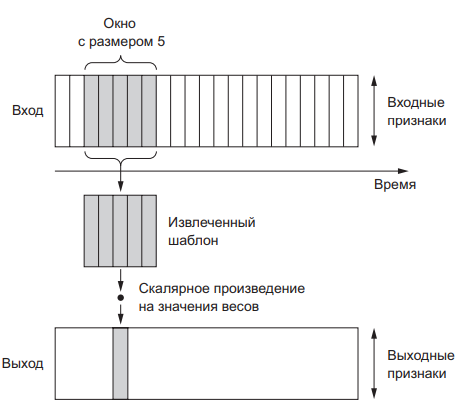

Рис. 1. Извлечение признаков с помощью одномерной свертки

Такие одномерные сверточные слои способны распознавать локальные шаблоны
в последовательности. Поскольку к каждому шаблону применяются одни и те же
преобразования, тот или иной шаблон, найденный в некоторой позиции в предложении, позднее может быть опознан в другой позиции, что делает преобразования, выполняемые одномерными сверточными сетями, инвариантными (во времени).

Например, одномерная сверточная сеть, обрабатывающая последовательность
символов и использующая окно свертки с размером 5, способна запоминать слова или фрагменты слов длиной до 5 символов и распознавать эти слова в любом
контексте во входной последовательности, — то есть одномерная сверточная сеть,
обрабатывающая текст посимвольно, способна изучить морфологию слов.

### Выбор соседних значений

Мы с вами уже знакомы с двумерными операциями выбора соседних значений, такими
как выбор среднего или максимального значения из двумерных данных, которые
используются в сверточных сетях для уменьшения разрешения тензоров с изображениями.

Двумерные операции выбора имеют одномерный эквивалент, извлекающий одномерные шаблоны (подпоследовательности) из входных данных и возвращающий максимальное (выбор максимального значения из соседних `MaxPooling1D`) или среднее значение (выбор среднего значения из соседних `AveragePooling1D`). Так же как в двумерных сверточных сетях, эта операция используется для уменьшения длины одномерного входа (снижения разрешения).

### Реализация простой сети

В Keras одномерные сверточные сети создаются с помощью слоя `Conv1D`, интерфейс
которого напоминает интерфейс слоя `Conv2D`. Он принимает на входе трехмерные
тензоры с формой `(образцы, время, признаки)` и возвращает трехмерные тензоры
с той же формой.

Окно свертки — это одномерное окно на оси времени, т.е. оси с индексом 1 во входном тензоре.

Сконструируем простую двухслойную одномерную сверточную сеть и используем ее для решения уже знакомой нам задачи определения эмоциональной окраски отзывов в наборе данных IMDB.


#### Подготовка данных

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f'Длина обучающей выборки: {len(x_train)}')
print(f'Длина тестовой выборки: {len(x_test)}')


# Приведем все примеры к одной длине max_len
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('форма x_train:', x_train.shape)
print('форма x_test:', x_test.shape)

Длина обучающей выборки: 25000
Длина тестовой выборки: 25000
форма x_train: (25000, 500)
форма x_test: (25000, 500)


#### Архитектура сети

Одномерные сверточные сети устроены так же, как их двумерные, с которыми мы уже познакомились. Они состоят из последовательности слоев `Conv1D` и `MaxPooling1D`, завершающейся слоем `GlobalMaxPooling1D` или `Flatten`, который
преобразует трехмерный вывод в двумерный, что позволяет добавить в модель один
или несколько слоев `Dense` для классификации или регрессии.

Несмотря на сходство, существует одно важное отличие — возможность использовать в одномерных сверточных сетях более крупные окна свертки.

Окна свертки `3 × 3` в двумерном сверточном слое содержат `3 × 3 = 9` векторов признаков, а в одномерном сверточном слое окно с размером 3 содержит только 3 вектора признаков. Соответственно, мы легко можем использовать окна свертки с размером 7 или 9.



In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 98, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                

Epoch 1/10
157/157 [==============================] - 74s 468ms/step - loss: 0.5750 - acc: 0.6921 - val_loss: 0.4793 - val_acc: 0.8228
Epoch 2/10
157/157 [==============================] - 67s 429ms/step - loss: 0.3768 - acc: 0.8723 - val_loss: 0.4053 - val_acc: 0.8636
Epoch 3/10
157/157 [==============================] - 67s 424ms/step - loss: 0.3086 - acc: 0.9075 - val_loss: 0.5061 - val_acc: 0.8704
Epoch 4/10
157/157 [==============================] - 67s 426ms/step - loss: 0.2760 - acc: 0.9290 - val_loss: 0.5831 - val_acc: 0.8660
Epoch 5/10
157/157 [==============================] - 69s 437ms/step - loss: 0.1996 - acc: 0.9545 - val_loss: 0.6789 - val_acc: 0.8642
Epoch 6/10
157/157 [==============================] - 67s 426ms/step - loss: 0.1682 - acc: 0.9707 - val_loss: 0.7259 - val_acc: 0.8748
Epoch 7/10
157/157 [==============================] - 66s 422ms/step - loss: 0.1303 - acc: 0.9829 - val_loss: 0.8380 - val_acc: 0.8710
Epoch 8/10
157/157 [==============================] - 6

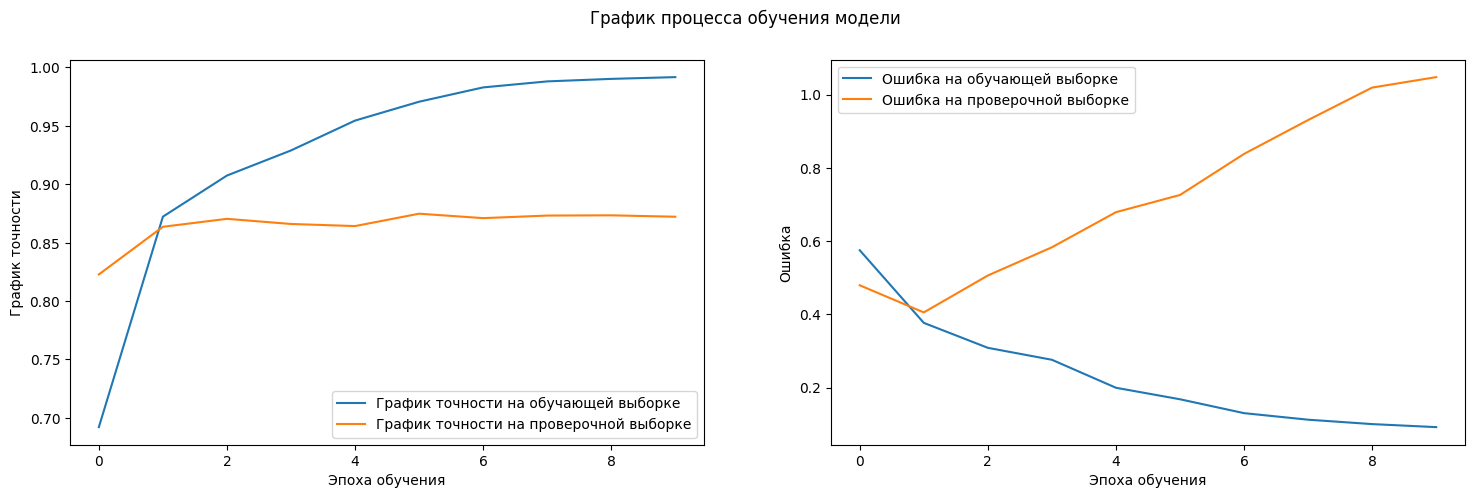

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('График процесса обучения модели')
ax1.plot(history.history['acc'], label='График точности на обучающей выборке')
ax1.plot(history.history['val_acc'], label='График точности на проверочной выборке')
ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('График точности')
ax1.legend()

ax2.plot(history.history['loss'], label='Ошибка на обучающей выборке')
ax2.plot(history.history['val_loss'], label='Ошибка на проверочной выборке')
ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Ошибка')
ax2.legend()
plt.show()

Данный короткий пример, причем рассчитанный на обычном CPU, служит убедительной демонстрацией того, что одномерная сверточная нейронная сеть может служить быстрой и недорогой альтернативой рекуррентной сети в задаче определения эмоциональной окраски текста. Мы добились 87% точности, за 12 минут обучения на обычном CPU, не используя предобученных весов для эмбединга! Но всегда надо исходить из задачи. Что сработало здесь и сейчас, не обязательно будет работать на других данных и задачах. Поэтому всегда сначала надо попробовать более простые архитектуры и постепенно их усложнять, достигая необходимых требований к задаче.

Теперь прежде чем приступить к настоящему исследованию и сравнению различных архитектур нейронных сетей для обработки последовательной информации, давайте подведем промежуточный итог и дадим рекомендации по использованию рекуррентных и одномерных сверточных сетей:

* Рекуррентные сети можно использовать для регрессии (прогнозирования будущего), классификации, выделения аномалий и маркировки последовательностей (например, для выделения имен или дат в предложениях).

* Аналогично одномерные сверточные сети можно использовать для реализации
машинного перевода, классификации текстов и проверки орфографии.

* Если глобальный порядок следования данных в последовательности имеет значение, обрабатывать такие данные предпочтительнее с применением рекуррентной
сети. Это относится, например, к временным последовательностям, в которых
недавнее прошлое более информативно, чем отдаленное.

* Если глобальный порядок следования данных не имеет решающего значения,
для их обработки, то можно использовать одномерные сверточные сети,
применение которых менее затратно, а полученный результат оказывается по
крайней мере не хуже. Это в особенности относится к текстовым данным, где
ключевой шаблон, найденный в начале предложения, будет не менее значимым,
чем шаблон, найденный в конце.

А теперь небольшое исследование. В следующем [Блокноте](https://colab.research.google.com/drive/15-SEqMwU3ALZmiEtlJFZllc38VTGHkGu) мы сравним 9 разных архитектур для обработки текстовых данных и сделаем выводы о их эффективности на примере уже известном нам датасете "Русских писателей".